# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [53]:
# Libraries
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [54]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [55]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [56]:
# AVERAGE STEPS BY MONTH_ENCODED

#Primero voy a agrupar los datos y calculo el num promedio de pasos para cada mes y lo convierto a DF

steps_bymonth = fitbit.groupby('Months')['Steps'].mean()
steps_bymonth= steps_bymonth.reset_index()
steps_bymonth

,Months,Steps
0,April,13079.033333
1,August,11584.774194
2,December,8470.064516
3,February,8922.866667
4,January,9892.064516
5,July,9193.322581
6,June,12536.166667
7,March,10312.935484
8,May,10620.096774
9,November,9467.466667


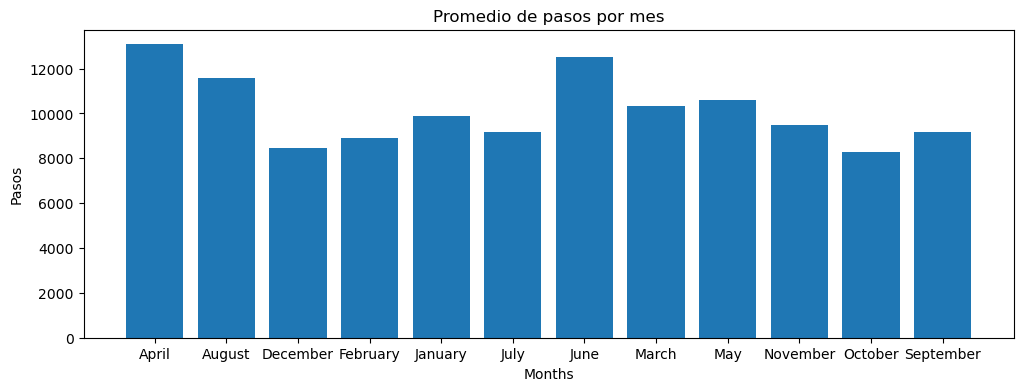

In [62]:
# Crear gráfico de barras

fig, ax = plt.subplots(figsize=(12, 4)) #se crea una fig 12,4 y un conjunto de ejes('ax') utilizando la función 'subplots'

ax.bar(steps_bymonth['Months'], steps_bymonth['Steps']) #utilizo el método 'bar' del objeto ejes 'ax' para crear un gráfico de barras

# Etiquetas y título del gráfico
ax.set_xlabel('Months')
ax.set_ylabel('Pasos')
ax.set_title('Promedio de pasos por mes')

# Mostrar el gráfico
plt.show()


In [63]:
#Guardo el gráfico en mi repo llamado figures

fig.savefig('figures/promedio_pasos_por_mes.png')

In [64]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

#Primero agrupo los datos y transformo a DF

steps_by_wow= fitbit.groupby('Work_or_Weekend')['Steps'].mean()
steps_by_wow = steps_by_wow.reset_index()
steps_by_wow

,Work_or_Weekend,Steps
0,0,10064.238095
1,1,10144.572519


In [ ]:
fig, ax = plt.subplots(figsize=(12, 4)) #se crea una fig 12,4 y un conjunto de ejes('ax') utilizando la función 'subplots'

ax.bar(steps_bymonth['Work_or_Weekend'], steps_bymonth['Steps']) #utilizo el método 'bar' del objeto ejes 'ax' para crear un gráfico de barras

# Etiquetas y título del gráfico
ax.set_xlabel('Months')
ax.set_ylabel('Pasos')
ax.set_title('Promedio de pasos por mes')

# Mostrar el gráfico
plt.show()

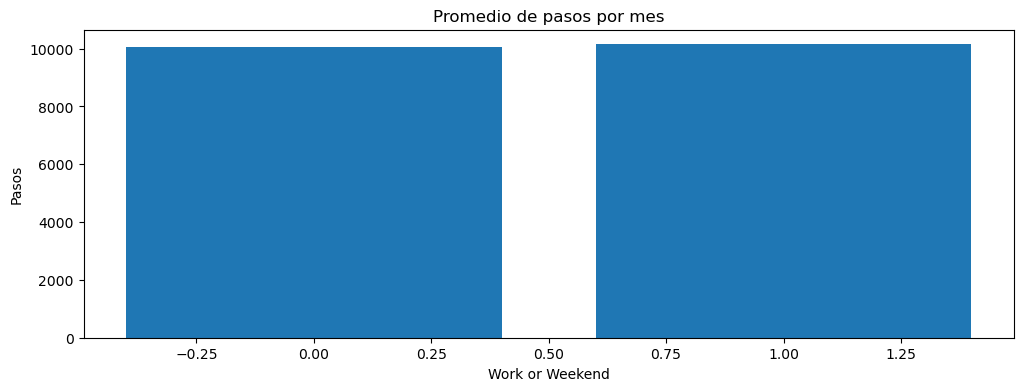

In [69]:
fig, ax = plt.subplots(figsize=(12,4))

ax.bar(steps_by_wow['Work_or_Weekend'], steps_by_wow['Steps'])

ax.set_xlabel('Work or Weekend')
ax.set_ylabel('Pasos')
ax.set_title('Promedio de pasos por mes')

plt.show()

In [70]:
#Guaro el gráfico en mi repo
fig.savefig('figures/pasos_por_día_específico.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [74]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

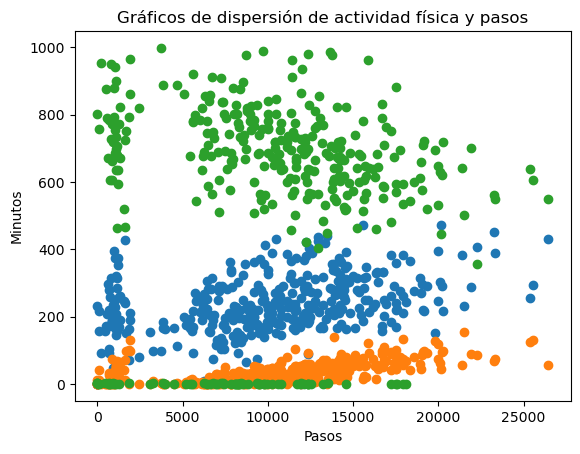

In [117]:
data = [
    ('Minutes Lightly Active', 'Minutes Lightly Active'),
    ('Minutes Very Active', 'Minutes Very Active'),
    ('Minutes Sedentary', 'Minutes Sedentary')]

for feature, label in data:
    plt.scatter(fitbit['Steps'], fitbit[feature], label=label)
    
plt.xlabel("Pasos")
plt.ylabel("Minutos")
plt.title("Gráficos de dispersión de actividad física y pasos")

plt.show();

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

#### Explore the titanic dataset using Pandas dtypes.

In [116]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [120]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [125]:
# NUMERICAL VARIABLES
numerical = titanic.select_dtypes(include='number')
numerical.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [130]:
# CATEGORICAL VARIABLES
categorical = titanic.select_dtypes(include='object')
categorical.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

#### Use the right visulalization to show the distribution of column `Age`.

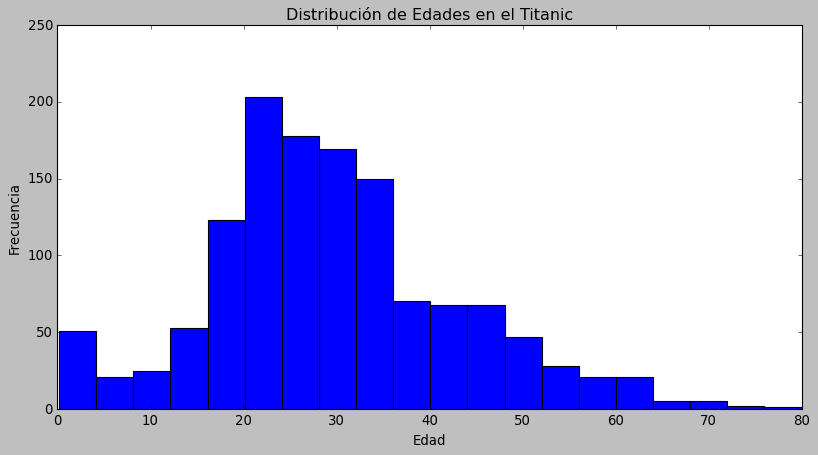

In [149]:
#El gráfico adecuado para representar este conjunto de datos es un histograma ya que este dato es numércio y tengo solo una variable

edades= titanic['Age'] #Selecciono la columna 'Age'

plt.figure(figsize=(12, 6))
plt.style.use('classic')

plt.hist(edades, #Representación gráfica
        bins=20)

plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades en el Titanic')

plt.show();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

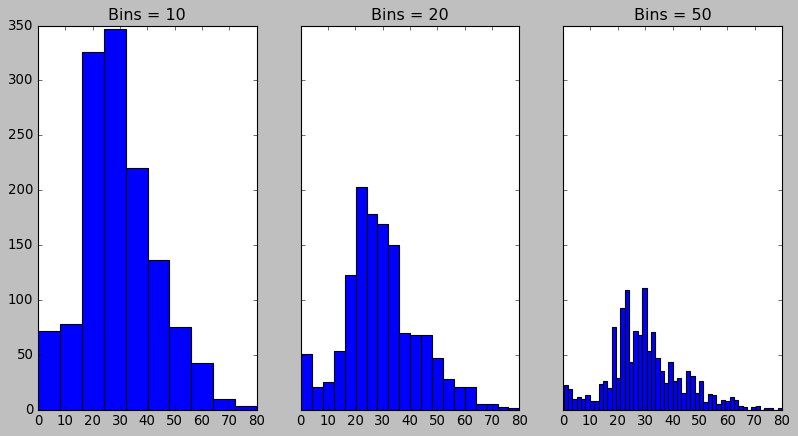

In [160]:
plt.style.use('classic') #Elijo el estilo
edades = titanic['Age'] #Selecciono los datos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6), sharey=True) #reprepresentación gráficos, uno para cada bin
#creo el histograma con los dif bins usando un bucle
for i,bin_size in enumerate([10,20,50]):
    axes[i].hist(edades, bins =bin_size)
    axes[i].set_title(f'Bins = {bin_size}')

plt.show();

#### How does the bin size affect your plot?

Un bin más pequeño, como este caso que sería 10, me proporciona más detalle y destaca las variaciones más sutiles en los datos. Por otro lado, bins más grandes, agrupan datos más amplios y suaviza la representación, además de ocultar variaciones más finas.

#### Use seaborn to show the distribution of column `Age`.

Text(0.5, 1.0, 'Distribución de edades en el Titanic')

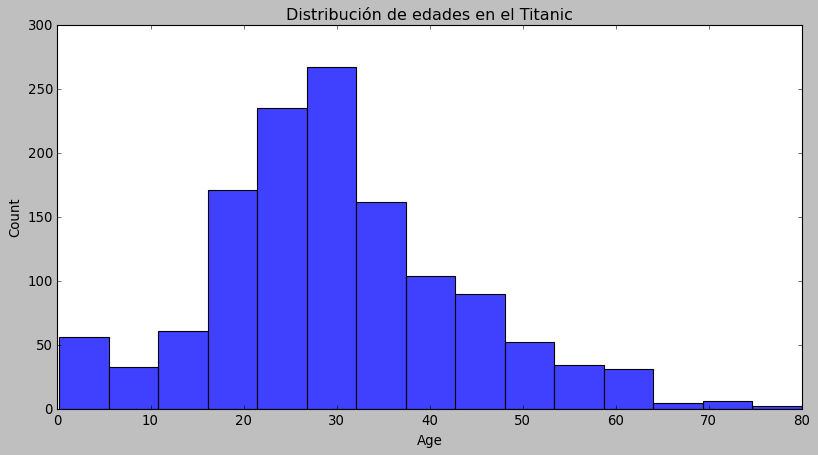

In [191]:
plt.style.use('classic')
plt.figure(figsize=(12,6))
sns.histplot(x=edades,
             bins=15);
plt.title('Distribución de edades en el Titanic')

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [182]:
# Method 1 - matplotlib

#El gráfico que consdero adecuado para esta representación es un gráfico circular, ya que este conjunto tiene solo una variable categórica 

#Identifico que 'gender' tiene valores de cadena 'female' y 'male'. Por lo que, cuento primero la freq de cada categoría.
genero= titanic['Gender']
conteo= genero.value_counts()
conteo

male      843
female    466
Name: Gender, dtype: int64

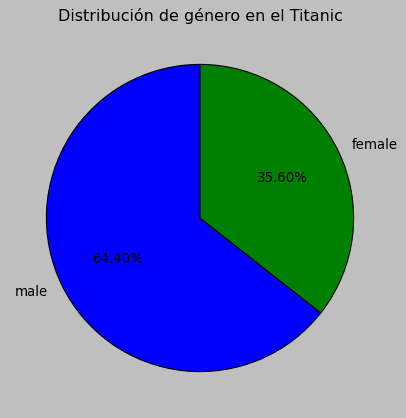

In [205]:
#Representación gráfica del conteo de gender
plt.style.use('classic')
plt.pie(conteo, labels=conteo.index, autopct ='%1.2f%%', startangle=90)
plt.title('Distribución de género en el Titanic')
plt.show();

Text(0.5, 1.0, 'Distribución de género en el Titanic')

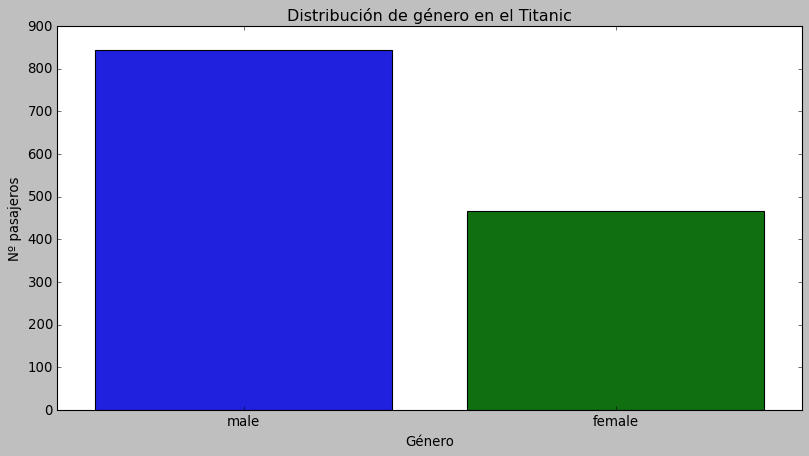

In [197]:
# Method 2 - seaborn
plt.style.use('classic')
plt.figure(figsize=(12,6))
sns.countplot(x=genero);
plt.xlabel('Género')
plt.ylabel('Nº pasajeros')
plt.title('Distribución de género en el Titanic')

#### Use the right plot to visualize the column `Pclass`.

In [207]:
#Consulto cuántas clases habían en el titanic

conteo_clase=titanic['Pclass'].value_counts()
conteo_clase

3    709
1    323
2    277
Name: Pclass, dtype: int64

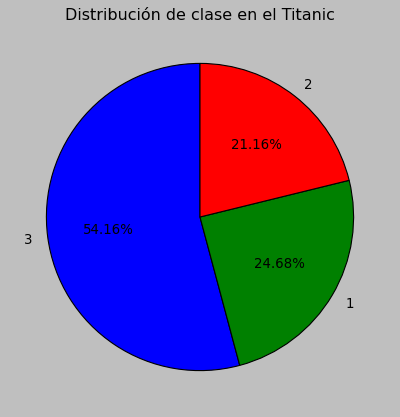

In [208]:
#Representación gráfica del conteo de gender
plt.style.use('classic')
plt.pie(conteo_clase, labels=conteo_clase.index, autopct ='%1.2f%%', startangle=90)
plt.title('Distribución de clase en el Titanic')
plt.show();

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [212]:
titanic['Age'].describe().T

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

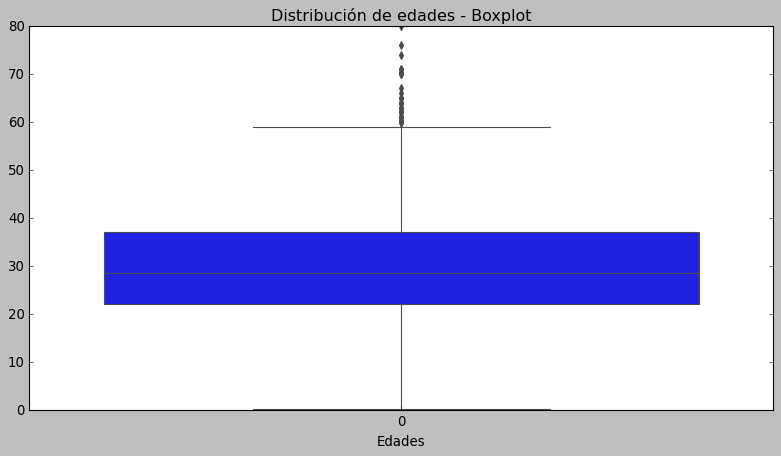

In [221]:
plt.style.use('classic')
plt.figure(figsize=(12,6))
sns.boxplot(edades);
plt.xlabel('Edades')
plt.ylabel('')
plt.title('Distribución de edades - Boxplot');

La opción que he considerado más adecuada es con un boxplot. Ya que, me proporciona unaa representación visual concisa de la distribución de los datos, incluyendo estadísticas clave como la mediana, los cuartiles y la presencia de valores atípicos.

#### What does the last plot tell you about the feature `Age`?

La visualización del boxplot me da los siguientes datos:
- Rango intercuartil (IQR): la caja representa el rango intercuartil, desde el primer cuartil(25%) hasta el tercer cuartil (75%) que va desde (aprox) los 22 años a los 37 años.

- Línea media: la línea dentro de la caja representa la mediana de las edades, que es al rededor de los 29.8 años.

- Rango de valores y valores atípicos: los fuera de este rango se consideran atípicos y los puntos más arriba del tercer cuartil son valores atípicos (outlier).

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

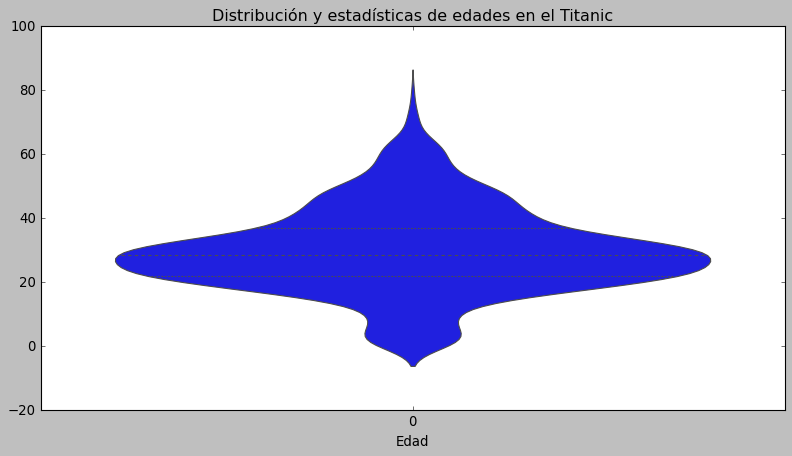

In [228]:
#Para mostrar tanto las estadísticas resumidas como la distribución de la edad en el mismo gráfico, la opción más eficaz es utilizar un 'violinplot'.
plt.style.use('classic')
plt.figure(figsize=(12,6))
sns.violinplot(edades, inner='quartile') #añadiendo inner=quartile muestro las estadisticas resumidas.
plt.xlabel('Edad')
plt.ylabel('')
plt.title('Distribución y estadísticas de edades en el Titanic');

#### What additional information does the last plot provide about feature `Age`?

- Distribución detallada: este gráfico proporniona una representación más detallada de la distribución de las edades. Se observa la forma de la distribución y cómo varía la densidad en diferentes rangos de edades.

- Concentación de datos: la anchura del violin indica la concentración de edades en los rangos de 22 a los 37 años. Las áreaa más delgadas indica menor concentración.

- Resumen estadístico integrado: al combinar el boxplot dentro del violín , obtengo las estadísticas resumidas como la mediana y los cuartiles en contexto de la distribución general.

En conclusión, el violin proporciona una visión más completa y detallada de la distribución de la edad, complementando las estadísticas resumidas ofrecidas por un boxplot.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Para visualizar la relación entre' fare' y 'age' considero adecuado utilizar el gráfico de dispersión.

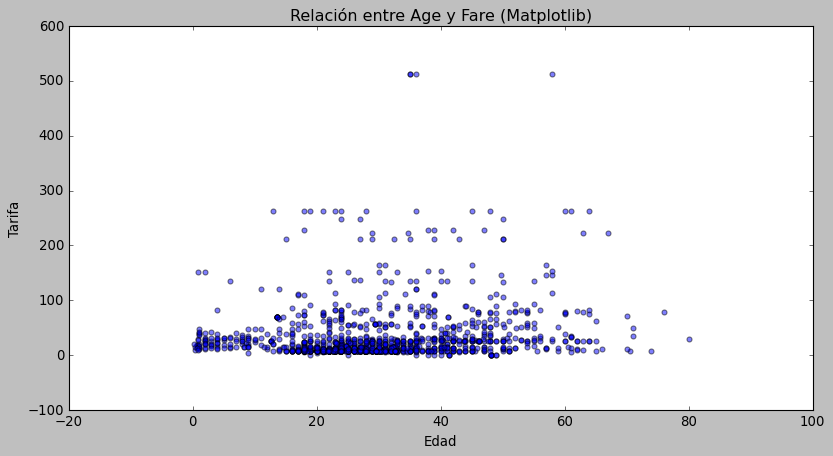

In [237]:
# Method 1 - matplotlib
fare= titanic['Fare']
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.scatter(edades, fare, alpha=0.5)
plt.title('Relación entre Age y Fare (Matplotlib)')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show();

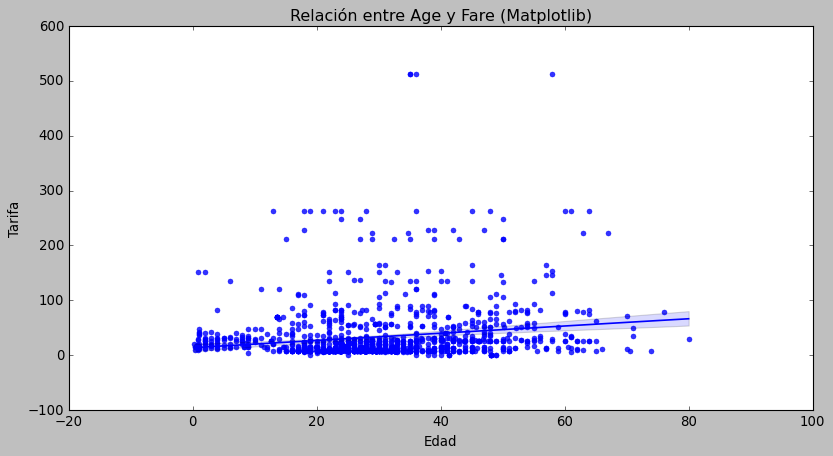

In [244]:
# Method 2 - seaborn
plt.style.use('classic')
plt.figure(figsize=(12,6))
sns.regplot(x=edades,
            y=fare);
plt.title('Relación entre Age y Fare (Matplotlib)')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show();

#### Plot the correlation matrix using seaborn.

In [247]:
corr =titanic.corr(method='pearson')
corr

C:\Users\carol\AppData\Local\Temp\ipykernel_21360\3928536779.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =titanic.corr(method='pearson')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


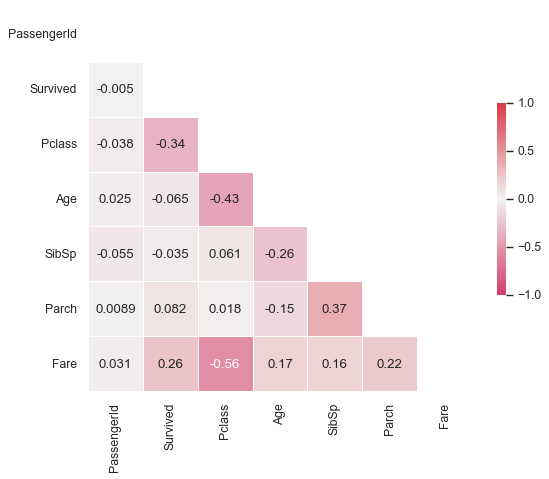

In [252]:
sns.set(style='white')
mascara= np.triu(np.ones_like(corr, dtype=bool)) #mascara
cmap= sns.diverging_palette(0,10, as_cmap=True) #paletadecolores
sns.heatmap(corr,
           mask=mascara,
           cmap=cmap,
           vmax=1,
           vmin=-1,
           center=0,
           square=True,
           linewidth=0.5,
           cbar_kws={'shrink':0.5},
           annot=True);

#### What are the most correlated features?

- Survived y Fare:

Hay una correlación positiva moderada (0.26) entre la supervivencia (Survived) y la tarifa pagada (Fare). Esto sugiere que pasajeros que pagaron tarifas más altas tienden a tener una mayor probabilidad de supervivencia.

- Parch y SibSp:

Hay una correlación positiva moderada (0.37) entre el número de padres/hijos a bordo (Parch) y el número de hermanos/cónyuges a bordo (SibSp). Esto indica que las familias tienden a viajar juntas.

- Pclass y Fare:

 Existe una correlación negativa fuerte (-0.56) entre la clase del pasajero (Pclass) y la tarifa pagada (Fare). Esto indica que las tarifas son más altas para las clases más altas.
 
- Age y Pclass:

Hay una correlación negativa moderada (-0.43) entre la edad (Age) y la clase del pasajero (Pclass). Esto sugiere que las clases más altas tienden a tener pasajeros más jóvenes.

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

Text(0, 0.5, 'Edad')

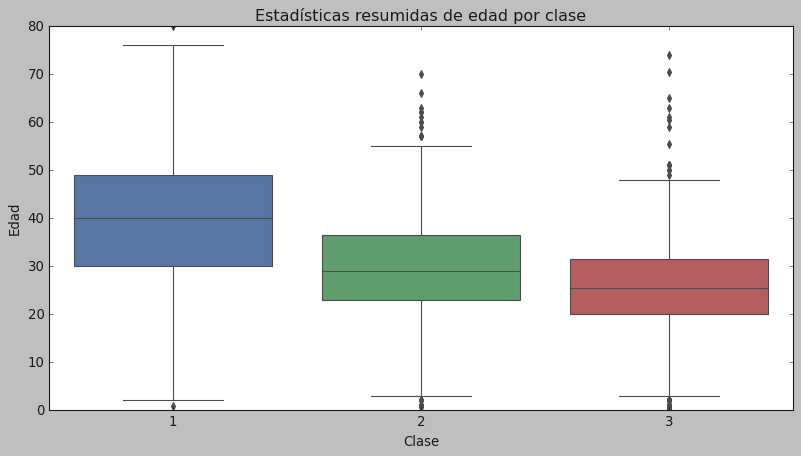

In [260]:
#Con boxplot podré proporcionar una buena manera de visualizar la distribución de una variable numérica en diferentes categorías.
clase = titanic['Pclass']
plt.style.use('classic')
plt.figure(figsize=(12, 6))
sns.boxplot(x=clase,
           y= edades);
plt.title('Estadísticas resumidas de edad por clase')
plt.xlabel('Clase')
plt.ylabel('Edad')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

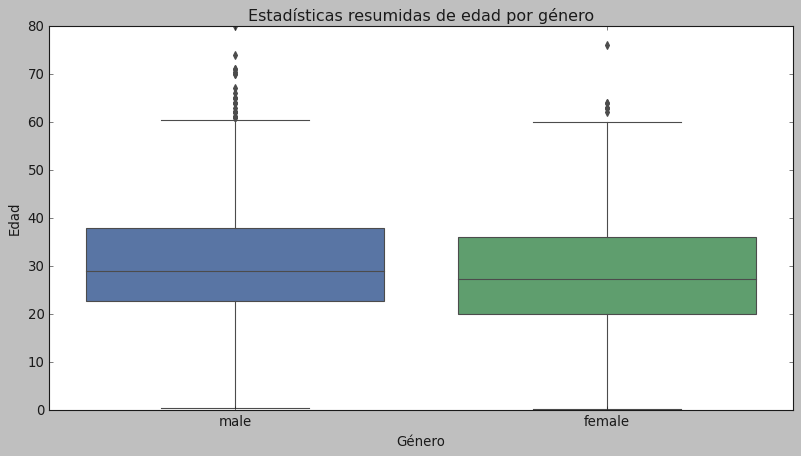

In [263]:
plt.figure(figsize=(12,6))
plt.style.use('classic')
sns.boxplot(x=genero,
           y=edades)
plt.title('Estadísticas resumidas de edad por género')
plt.xlabel('Género')
plt.ylabel('Edad');